In [326]:
import pandas as pd
import numpy as np
import string 
import re
import ast
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
stemmer=PorterStemmer()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [265]:
df=pd.read_csv('movies.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [266]:
# converting genres string in appropriate list using ast 
genres=[]
for i in range(len(df['genres'])):
    genres.append(ast.literal_eval(df['genres'][i]))

In [267]:
len(genres)

4803

In [268]:
indices_to_drop = []

if len(genres) == 0:
    print("The list 'genres' is empty.")
else:
    for i in range(len(genres)):
        if len(genres[i]) == 0 or 'name' not in genres[i][0]:
            indices_to_drop.append(i)

# Drop the rows from the DataFrame
df = df.drop(indices_to_drop).reset_index(drop=True)


In [269]:
# converting genres string in appropriate list using ast 
genres=[]
for i in range(len(df['genres'])):
    genres.append(ast.literal_eval(df['genres'][i]))

In [270]:
mk=[]
for i in range(len(genres)):
    mk.append(genres[i][0]['name'])

In [271]:
df['genre']=mk

In [253]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genre'],
      dtype='object')

In [272]:
def convert(text):
    m=[]
    for i in ast.literal_eval(text):
        m.append(i['name'])
    return m
def to_list(text):
    return list(text)
def remove_space(text):
    ms=[]
    for i in text:
        ms.append(i.replace(" ",""))
    return ms
        

In [273]:
df=df[['keywords','overview','tagline','title','genre']]

In [277]:

# df['keywords']=df['keywords'].apply(convert)
df['overview'] = df['overview'].apply(lambda x: x.split() if isinstance(x, str) else [])
df['tagline'] = df['tagline'].apply(lambda x: x.split() if isinstance(x, str) else [])
df['title']=df['title'].apply(remove_space)

In [279]:
df['everything']=df['keywords']+df['overview']+df['tagline']+df['title']

In [281]:
df=df[['everything','genre']]

In [282]:
df

,everything,genre
0,"[culture clash, future, space war, space colon...",Action
1,"[ocean, drug abuse, exotic island, east india ...",Adventure
2,"[spy, based on novel, secret agent, sequel, mi...",Action
3,"[dc comics, crime fighter, terrorist, secret i...",Action
4,"[based on novel, mars, medallion, space travel...",Action
...,...,...
4770,"[Adam,, a, security, guard,, travels, from, Ca...",Foreign
4771,"[united states–mexico barrier, legs, arms, pap...",Action
4772,"[A, newlywed, couple's, honeymoon, is, upended...",Comedy
4773,"[date, love at first sight, narration, investi...",Comedy


In [286]:
df['everything']=df['everything'].apply(lambda x : "".join(x))

C:\Users\puzan12\AppData\Local\Temp\ipykernel_6236\2395412798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['everything']=df['everything'].apply(lambda x : "".join(x))


In [313]:
def convert_text(text):
    ms="".join([ i for i in text if i not in string.punctuation])
    return [stemmer.stem(s) for s in ms.split() if s.lower() not in stopwords.words('english')]

In [319]:
vectorizer=CountVectorizer(analyzer=convert_text).fit(df['everything'])
bow_text=vectorizer.transform(df['everything'])

In [320]:
tfid_trans=TfidfTransformer().fit(bow_text)
tfid4=tfid_trans.transform(bow_text)

In [321]:
print(tfid4)

  (0, 16897)	0.3057890800223952
  (0, 16873)	0.32059745913287124
  (0, 16100)	0.32059745913287124
  (0, 14664)	0.32059745913287124
  (0, 13141)	0.3057890800223952
  (0, 11848)	0.32059745913287124
  (0, 3900)	0.3057890800223952
  (0, 3127)	0.32059745913287124
  (0, 2957)	0.32059745913287124
  (0, 340)	0.32059745913287124
  (1, 17202)	0.35505410226300654
  (1, 15979)	0.30438334405457956
  (1, 11199)	0.22327320990786184
  (1, 11128)	0.35505410226300654
  (1, 9208)	0.35505410226300654
  (1, 8455)	0.35505410226300654
  (1, 8202)	0.3179927049428242
  (1, 3334)	0.35505410226300654
  (1, 82)	0.35505410226300654
  (2, 14844)	0.4190822142167576
  (2, 14071)	0.4393770144958421
  (2, 13915)	0.3006002535645715
  (2, 10949)	0.3935137896977138
  (2, 8870)	0.4393770144958421
  (2, 532)	0.4393770144958421
  :	:
  (4766, 8691)	0.3804247106342909
  (4766, 8266)	0.3804247106342909
  (4766, 3401)	0.3804247106342909
  (4767, 8515)	1.0
  (4768, 6907)	0.7071067811865475
  (4768, 5627)	0.7071067811865475
  (47

In [330]:
x_train,x_test,y_train,y_test=train_test_split(df['everything'],df['genre'],test_size=0.20,shuffle=True)
pipeline=Pipeline([
    ('clf',CountVectorizer(analyzer=convert_text)),
    ('normaliser',TfidfTransformer()),
    ('claf',LogisticRegression())
])

In [332]:
pipeline.fit(x_train,y_train)

C:\Users\puzan12\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('clf',
                 CountVectorizer(analyzer=<function convert_text at 0x000001AC13CAF420>)),
                ('normaliser', TfidfTransformer()),
                ('claf', LogisticRegression())])

In [333]:
pipeline.predict(x_train)

array(['Drama', 'Drama', 'Drama', ..., 'Comedy', 'Comedy', 'Comedy'],
      dtype=object)

In [335]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pipeline.predict(x_test),y_test))

[[ 18  10   3   3   0   1   4   2   2   0   0   1   0   0   3   1   0   2]
 [  4   7   0   0   1   0   2   0   1   0   1   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 17  10   2  51   5   2  26   1   6   1   3   3   1   4   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [116  48  17 153  27  17 198  12  23   7  48   3   9  13  14  38   6   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0

<Axes: xlabel='genre'>

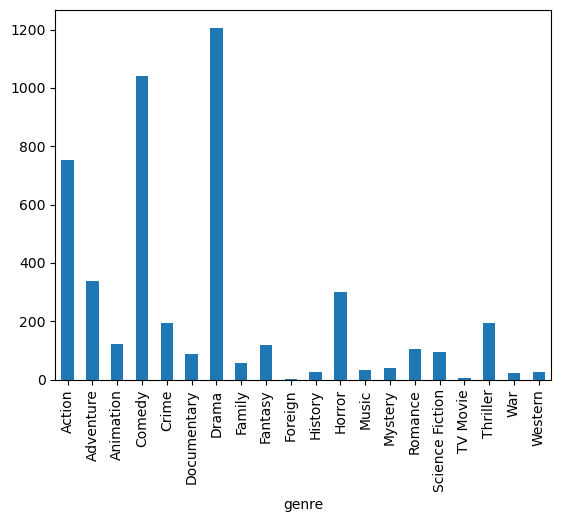

In [339]:
df.groupby('genre').everything.count().plot.bar()